# Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("rubgy_world_cup_20151.csv",encoding = "ISO-8859-1")#becouse normally this file is not running
ef = pd.read_csv("player_record.csv",encoding = "ISO-8859-1")


In [3]:
df.head(1)

,team,name,caps,position,years_since_debut,debut,age,approx_age_debuted,height_cm,weight_kg
0,Australia,Stephen Moore,102.0,Hooker,10.5,11-Jun-05,32,22,186,112


In [4]:
ef.head(1)

,name,team,total,tries,conversions,penalties,drop_goals
0,Nicolas Sanchez,Argentina,97,1,13,20,2


In [5]:
full = pd.merge(df,ef[['name','total','tries','conversions','penalties','drop_goals']], on='name',how='outer').sort_values(by='total',ascending =False).fillna(0)
full[full.position==0].head()


,team,name,caps,position,years_since_debut,debut,age,approx_age_debuted,height_cm,weight_kg,total,tries,conversions,penalties,drop_goals


This shows that are all important fields are non empty(Similarly also check for other feilds)

In [21]:
full.corr(method='pearson', min_periods=1)

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg,total,tries,conversions,penalties,drop_goals
caps,1.000000,0.808854,0.568492,-0.300477,0.074463,0.077300,0.101433,0.077510,0.113194,0.048917,0.066411
years_since_debut,0.808854,1.000000,0.725014,-0.332620,0.070821,0.092148,0.027515,0.001548,0.056202,0.013474,0.026865
age,0.568492,0.725014,1.000000,0.400559,0.058969,0.222803,-0.052296,-0.076468,0.006189,-0.033220,-0.027648
approx_age_debuted,-0.300477,-0.332620,0.400559,1.000000,-0.009362,0.189381,-0.108230,-0.104985,-0.066454,-0.065057,-0.068844
height_cm,0.074463,0.070821,0.058969,-0.009362,1.000000,0.580707,-0.097314,-0.014501,-0.116343,-0.089582,-0.040807
weight_kg,0.077300,0.092148,0.222803,0.189381,0.580707,1.000000,-0.214894,-0.122374,-0.170256,-0.178654,-0.070553
total,0.101433,0.027515,-0.052296,-0.108230,-0.097314,-0.214894,1.000000,0.468787,0.812486,0.874627,0.634454
tries,0.077510,0.001548,-0.076468,-0.104985,-0.014501,-0.122374,0.468787,1.000000,0.028986,0.035247,-0.015360
conversions,0.113194,0.056202,0.006189,-0.066454,-0.116343,-0.170256,0.812486,0.028986,1.000000,0.782263,0.632138
penalties,0.048917,0.013474,-0.033220,-0.065057,-0.089582,-0.178654,0.874627,0.035247,0.782263,1.000000,0.683212


In [22]:
full.describe()

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg,total,tries,conversions,penalties,drop_goals
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,32.279753,5.020247,27.723338,22.874807,186.108192,102.964451,3.718702,0.411128,0.295209,0.344668,0.012365
std,25.068092,3.628637,3.735338,2.758847,7.205995,12.820394,10.066867,0.885591,1.596540,1.949890,0.146693
min,0.000000,0.000000,19.000000,18.000000,165.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,2.000000,25.000000,21.000000,181.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,4.300000,28.000000,22.000000,186.000000,103.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,7.400000,30.000000,24.000000,191.000000,113.000000,5.000000,1.000000,0.000000,0.000000,0.000000
max,148.000000,17.000000,38.000000,34.000000,208.000000,145.000000,97.000000,8.000000,23.000000,23.000000,2.000000


In [8]:
team_sum = full.groupby('team').sum()
team_sum.head(2)

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg,total,tries,conversions,penalties,drop_goals
team,,,,,,,,,,,
Argentina,1024.0,165.1,882,723,6140,3329,250.0,27.0,23.0,21.0,2.0
Australia,1439.0,173.0,902,738,6203,3466,222.0,28.0,17.0,16.0,0.0


In [6]:
full['position'].unique()

array(['Fly Half', 'Scrum Half', 'Full Back', 'Wing', 'Centre',
       'Back Row', 'Prop', 'Hooker', 'Lock', 'Utility Forward',
       'Utility Back'], dtype=object)

In [17]:
position=full.groupby('position')

In [9]:
team_avg = full.groupby('team').mean()
team_avg.head(2)

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg,total,tries,conversions,penalties,drop_goals
team,,,,,,,,,,,
Argentina,31.030303,5.003030,26.727273,21.909091,186.060606,100.878788,7.575758,0.818182,0.696970,0.636364,0.060606
Australia,43.606061,5.242424,27.333333,22.363636,187.969697,105.030303,6.727273,0.848485,0.515152,0.484848,0.000000


## Analysis on age factor.

In [10]:
team_avg

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg,total,tries,conversions,penalties,drop_goals
team,,,,,,,,,,,
Argentina,31.030303,5.003030,26.727273,21.909091,186.060606,100.878788,7.575758,0.818182,0.696970,0.636364,0.060606
Australia,43.606061,5.242424,27.333333,22.363636,187.969697,105.030303,6.727273,0.848485,0.515152,0.484848,0.000000
Canada,25.757576,5.396970,27.818182,22.696970,184.878788,100.303030,1.757576,0.212121,0.121212,0.151515,0.000000
England,28.968750,3.996875,26.656250,22.750000,186.593750,104.125000,3.593750,0.437500,0.187500,0.312500,0.031250
Fiji,22.121212,4.793939,28.242424,23.757576,186.030303,103.939394,2.242424,0.242424,0.242424,0.181818,0.000000
France,34.812500,5.593750,28.531250,23.062500,186.781250,104.562500,4.156250,0.406250,0.406250,0.437500,0.000000
Georgia,38.030303,6.366667,26.484848,20.181818,184.787879,102.090909,1.606061,0.151515,0.151515,0.181818,0.000000
Ireland,36.363636,5.309091,28.515152,23.303030,187.515152,103.878788,4.666667,0.545455,0.424242,0.363636,0.000000
Italy,38.294118,5.676471,27.735294,22.264706,186.735294,103.323529,2.176471,0.205882,0.176471,0.264706,0.000000


## Analysis on Experience

In this plot we can easily understand that the New Zealand team played more matches in compair to other teams 

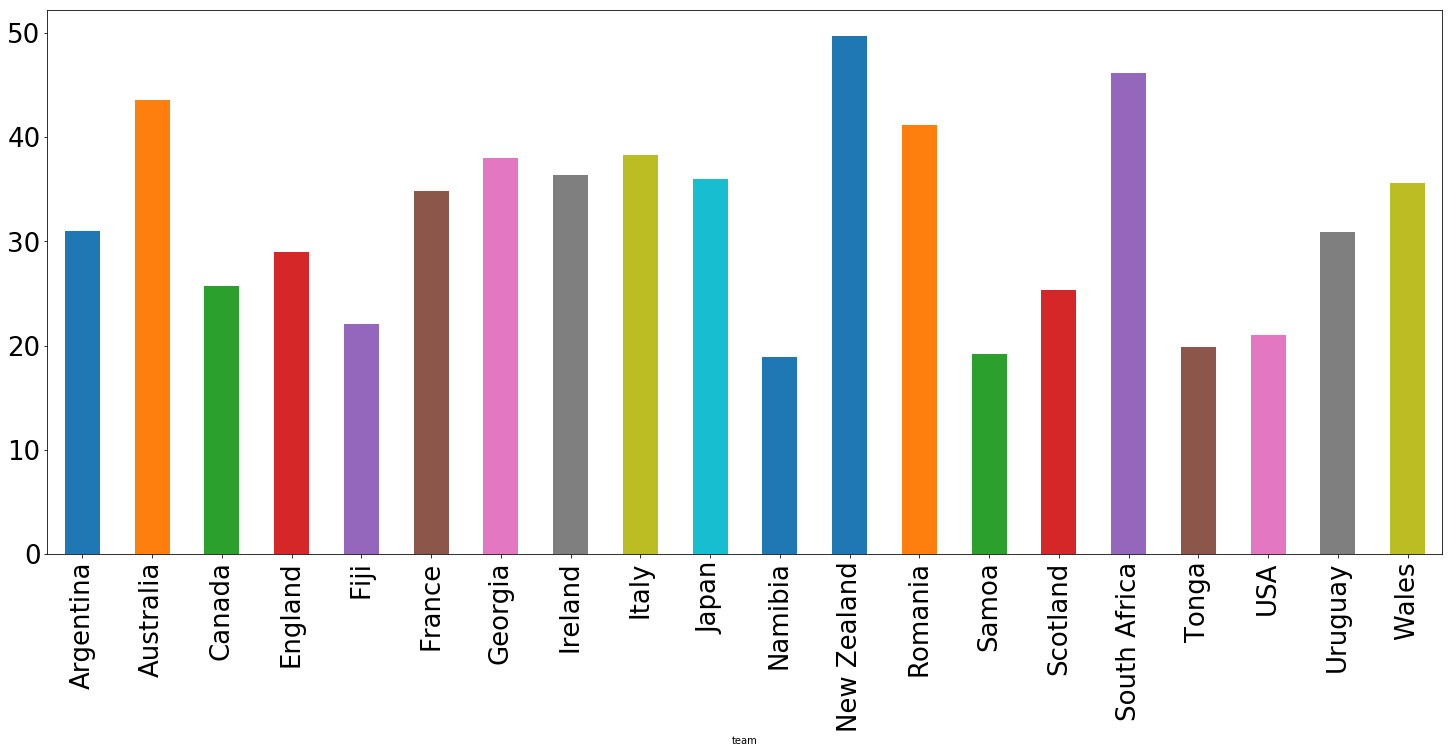

In [11]:
team_avg['caps'].plot.bar(figsize=(25,10),fontsize=26)

### Find age different of various position according to team


(15, 35)

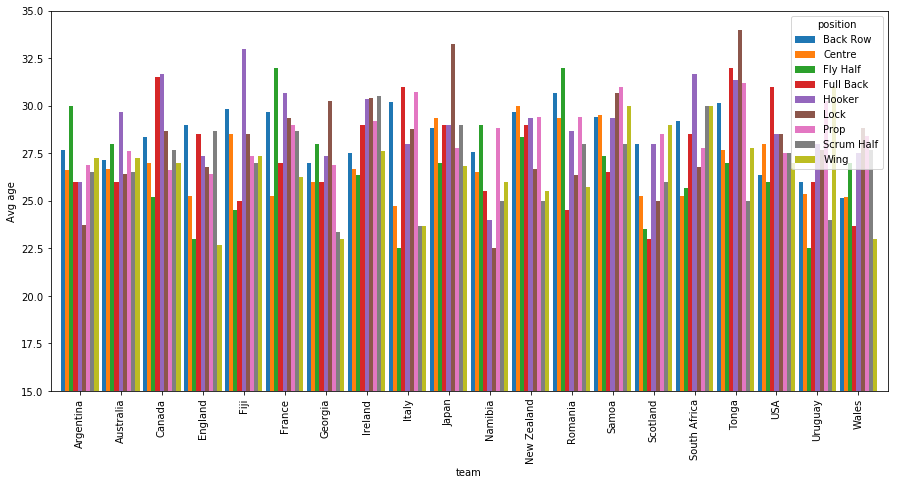

In [12]:
a = full[['team','position','age']][(full.position!= 'Utility Back') & (full.position!= 'Utility Forward')]
fig, ax = plt.subplots(figsize=(15,7)) 
ax.set_ylabel("Avg age") 
a.groupby(['team','position']).mean()['age'].unstack().plot(ax=ax,kind='bar', width=0.92).set_ylim(15,35)


In [13]:
a = full[['team','approx_age_debuted']][(full.position!= 'Utility Back') & (full.position!= 'Utility Forward')].groupby('team')
a.head()

,team,approx_age_debuted
302,Argentina,22
558,South Africa,20
257,New Zealand,21
63,Australia,24
567,Scotland,25
103,Japan,18
170,Wales,19
167,Italy,20
638,New Zealand,22
456,Ireland,23
